

Comparative analysis of stock prediction using machine learning algorithm 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 
from math import sqrt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset/SBIN.NS.csv')
#df = pd.DataFrame(data, columns=['Date','Close'])
df['Open'].fillna(df['Open'].mean(),inplace=True)
df['High'].fillna(df['High'].mean(),inplace=True)
df['Low'].fillna(df['Low'].mean(),inplace=True)
a=df['Close'].fillna(df['Close'].mean(),inplace=True)
df['Adj Close'].fillna(df['Adj Close'].mean(),inplace=True)
df['Volume'].fillna(df['Volume'].mean(),inplace=True)
df.head()
df.to_csv(r'file_name.csv',index= False)

OHLCV graph

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Ohlc(x=df['Date'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close']))
fig.update_layout(
    title='Close Stock Price History [2000 - 2020]',
    yaxis_title='SBI Stock')


fig.show()

find increase and decrease

In [ ]:
df.drop(['Adj Close'], axis=1, inplace = True)
df.drop(['Low'], axis=1, inplace = True)
 
 
df

In [ ]:

df['O_C'] = df['Close'] - df['Open']
#df['I_D'] = np.where(df['Adj Close'].shift(-1) > df['Adj Close'],1,0)
df['I_D'] = np.where(df['O_C']> 0,1,0)
#df=df.set_index('Date')
X= df[['Open','High','Close','Adj Close','Volume']].values
y = df['I_D'].values


df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,O_C,I_D
0,2000-01-24,22.328400,22.677500,21.427401,21.540600,1.022121,1.966714e+07,-0.787800,0
1,2000-01-25,21.323601,21.502800,21.002800,21.215099,1.006676,2.359792e+07,-0.108502,0
2,2000-01-26,163.208134,165.533635,160.607032,162.952856,114.820401,2.185570e+07,-0.255278,0
3,2000-01-27,21.606600,22.219900,21.512300,21.715099,1.030402,2.120510e+07,0.108499,1
4,2000-01-28,21.955700,23.455900,21.955700,23.446501,1.112558,5.276228e+07,1.490801,1


In [ ]:
df['I_D'].value_counts()

0    2719
1    2291
Name: I_D, dtype: int64

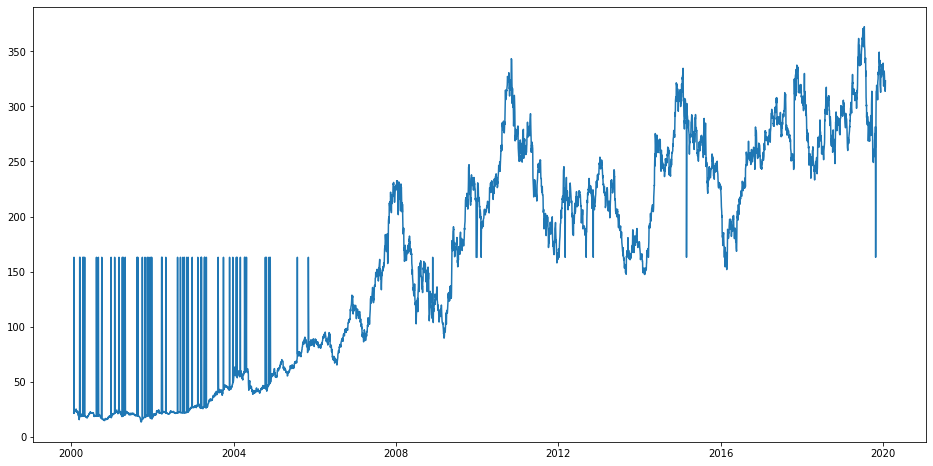

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')



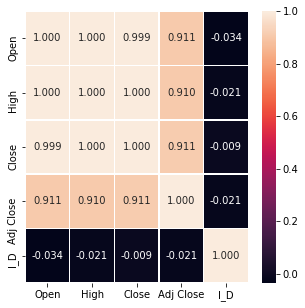

In [ ]:


f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df[['Open', 'High','Close','Adj Close','I_D']].corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)



split the dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
# split training and test data

# Convert lists into numpy arrays 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print (x_train.shape,x_test.shape)
print (y_train.shape,y_test.shape)
#train_X = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
#test_X = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
#print(train_X.shape, y_train.shape, test_X.shape, y_test.shape)
#test_images = x_test.reshape((1002, 1,5))
##train_images = x_train.reshape((4008, 1,5))
#y_train = y_train.reshape((4008,1))
#y_test = y_test.reshape(1002,1)
#print(test_images.shape, train_images.shape,y_train.shape)

(4008, 5) (1002, 5)
(4008,) (1002,)


Ada decision tree

The rmse of prediction is: 0.3503633699717538
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       559
           1       0.87      0.85      0.86       443

    accuracy                           0.88      1002
   macro avg       0.88      0.87      0.88      1002
weighted avg       0.88      0.88      0.88      1002



Text(0.5, 257.44, 'Predicted label')

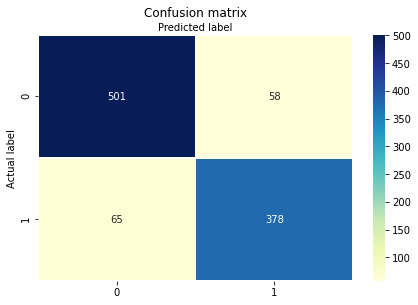

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=4) 
ada = AdaBoostClassifier(n_estimators=2000,learning_rate=0.2,base_estimator=classifier, random_state=0)
ada.fit(x_train, y_train)
y_pred=ada.predict(x_test)
print('The rmse of prediction is:', sqrt(mean_squared_error(y_test, y_pred)))

 
print(classification_report(y_test, y_pred))
cm_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True,linewidths=.5, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

adaboost random forest

The rmse of prediction is: 0.4388789929571497
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       559
           1       0.79      0.78      0.78       443

    accuracy                           0.81      1002
   macro avg       0.80      0.80      0.80      1002
weighted avg       0.81      0.81      0.81      1002



Text(0.5, 257.44, 'Predicted label')

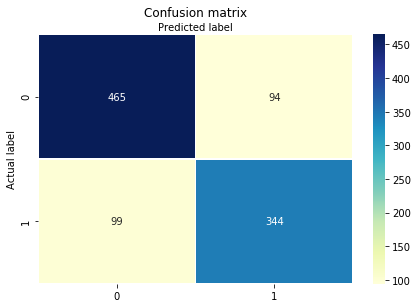

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,criterion = 'entropy')
ada = AdaBoostClassifier(n_estimators=2000,base_estimator=model,learning_rate=0.2,  random_state=0)
ada.fit(x_train, y_train)
y_pred=ada.predict(x_test)
print('The rmse of prediction is:', sqrt(mean_squared_error(y_test, y_pred)))
 
print(classification_report(y_test, y_pred))
cm_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True,linewidths=.5, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Decision tree

The root mean square erroris: 0.6634152247868916
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       559
           1       0.87      0.85      0.86       443

    accuracy                           0.88      1002
   macro avg       0.88      0.87      0.88      1002
weighted avg       0.88      0.88      0.88      1002



Text(0.5, 257.44, 'Predicted label')

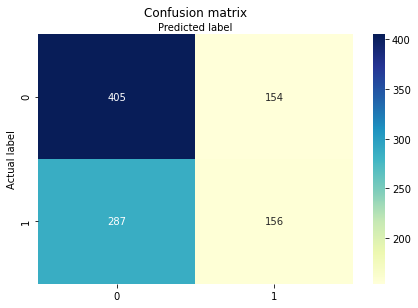

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)  
classifier.fit(x_train, y_train)
y_pred_dt = classifier.predict(x_test)
print('The root mean square erroris:', sqrt(mean_squared_error(y_test, y_pred_dt)))
print(classification_report(y_test, y_pred))
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

cm_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cm_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Naive Bayes

Random Forest

The root mean square erroris: 0.4467670516087703
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       559
           1       0.78      0.76      0.77       443

    accuracy                           0.80      1002
   macro avg       0.80      0.80      0.80      1002
weighted avg       0.80      0.80      0.80      1002



Text(0.5, 257.44, 'Predicted label')

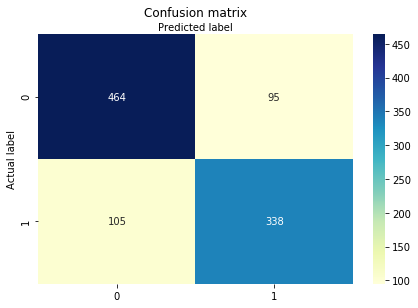

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100,criterion = 'entropy',random_state=0)
clf_rf.fit(x_train,y_train)
y_pred_rf = clf_rf.predict(x_test)
print('The root mean square erroris:', sqrt(mean_squared_error(y_test, y_pred_rf)))
#print('Accuracy Score: ',metrics.accuracy_score(y_test, y_pred_rf))
 
print(classification_report(y_test, y_pred_rf))
cm_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cm_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Gradient Boosting

The rmse of prediction is: 0.34750321298360987
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       559
           1       0.88      0.84      0.86       443

    accuracy                           0.88      1002
   macro avg       0.88      0.88      0.88      1002
weighted avg       0.88      0.88      0.88      1002



Text(0.5, 257.44, 'Predicted label')

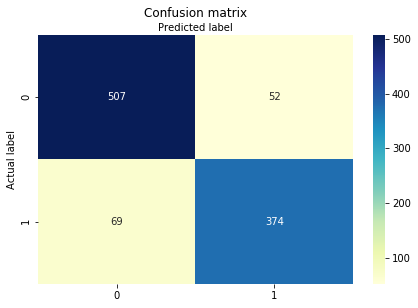

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(n_estimators=2000,learning_rate=0.2)
clf_gb.fit(x_train,y_train)
y_pred_gb = clf_gb.predict(x_test)
print('The rmse of prediction is:',sqrt( mean_squared_error(y_test, y_pred_gb)))
#print('Gradient Boosting Regression Score:', accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
cm_matrix = metrics.confusion_matrix(y_test, y_pred_gb)
cm_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Support vector classifier

The rmse of prediction is: 0.6656679145453007
Support vector Regression Score: 0.5568862275449101
              precision    recall  f1-score   support

           0       0.57      0.88      0.69       559
           1       0.50      0.15      0.23       443

    accuracy                           0.56      1002
   macro avg       0.53      0.51      0.46      1002
weighted avg       0.54      0.56      0.48      1002



Text(0.5, 257.44, 'Predicted label')

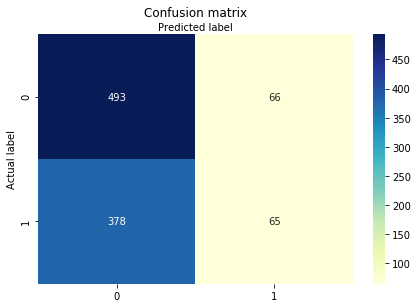

In [ ]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='rbf')
clf_svc.fit(x_train,y_train)
y_pred_svm = clf_svc.predict(x_test)

print('The rmse of prediction is:',sqrt( mean_squared_error(y_test, y_pred_svm)))
print('Support vector Regression Score:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cm_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
cm_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Ada SVM

The rmse of prediction is: 0.6649178659526859
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       559
           1       0.00      0.00      0.00       443

    accuracy                           0.56      1002
   macro avg       0.28      0.50      0.36      1002
weighted avg       0.31      0.56      0.40      1002



Text(0.5, 15.0, 'Predicted label')

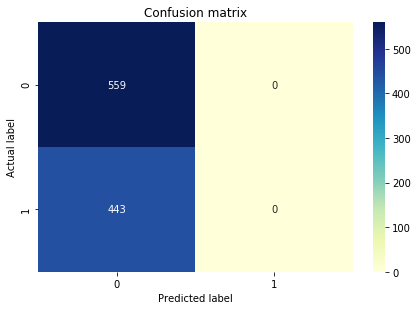

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='rbf')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=100, base_estimator=svc,learning_rate=0.01)
abc.fit(x_train, y_train)
y_pred=abc.predict(x_test)
print('The rmse of prediction is:', sqrt(mean_squared_error(y_test, y_pred)))

 
print(classification_report(y_test, y_pred))
cm_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_matrix
sns.heatmap(pd.DataFrame(cm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

neural network

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

The rmse of prediction is: 0.3298218233072829
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       559
           1       0.81      0.99      0.89       443

    accuracy                           0.89      1002
   macro avg       0.90      0.90      0.89      1002
weighted avg       0.91      0.89      0.89      1002

[[453 106]
 [  3 440]]


Text(0.5, 15.0, 'Predicted label')

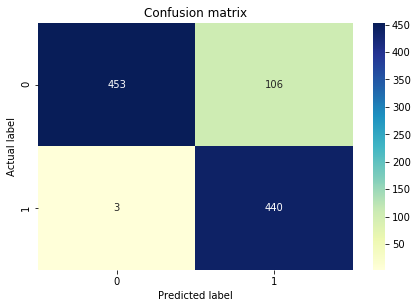

In [ ]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('The rmse of prediction is:', sqrt(mean_squared_error(y_test, predictions)))

 
print(classification_report(y_test,predictions))
cm_matrix = metrics.confusion_matrix(y_test, predictions)
cm_matrix

print(confusion_matrix(y_test,predictions))
sns.heatmap(pd.DataFrame(cm_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Recurrent neural network

In [ ]:
X= df[['Open','High','Close','Adj Close','Volume']].values
y = df[['I_D']].values
X.shape
y.shape

(5010, 1)

In [ ]:
num_data = len(X)
train_split = 0.8
num_train = int(train_split * num_data)
num_train
num_test = num_data - num_train
num_test
x_train = X[0:num_train]
x_test = X[num_train:]
len(x_train) + len(x_test)

5010

In [ ]:
y_train = y[0:num_train]
y_test = y[num_train:]
len(y_train) + len(y_test)

5010

In [ ]:
num_x_signals = X.shape[1]
num_x_signals

5

In [ ]:
num_y_signals = y.shape[1]
num_y_signals

1

In [ ]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 132074920.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [ ]:
x_test_scaled = x_scaler.transform(x_test)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(4008, 5)
(4008, 1)


In [ ]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [ ]:
batch_size = 256
generator = batch_generator(batch_size=batch_size,
                            sequence_length=168)
x_batch, y_batch = next(generator)
print(x_batch.shape)
print(y_batch.shape)

(256, 168, 5)
(256, 168, 1)


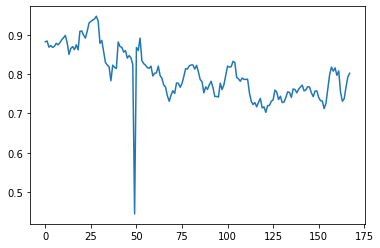

In [ ]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

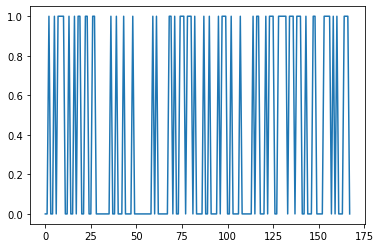

In [ ]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [ ]:
from tensorflow.keras.layers import *

In [ ]:

from tensorflow.keras.models import Sequential
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))
model = Sequential()
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))
model.add(Dense(num_y_signals, activation='sigmoid'))
warmup_steps = 50

In [ ]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(lr=1e-3)
model.compile(loss=loss_mse_warmup, optimizer=optimizer)
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, None, 512)         795648    
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           513       
Total params: 796,161
Trainable params: 796,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# from tf.keras.models import Sequential  # This does not work!

from tensorflow.keras.layers import Input, Dense, GRU, Embedding

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [ ]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [ ]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [ ]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [ ]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [ ]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [ ]:
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/20
  1/100 [..............................] - ETA: 37s - loss: 0.2446
Epoch 00001: val_loss improved from inf to 0.24458, saving model to 23_checkpoint.keras
100/100 [==============================] - 29s 286ms/step - loss: 0.2473 - val_loss: 0.2446
Epoch 2/20
  1/100 [..............................] - ETA: 29s - loss: 0.2400
Epoch 00002: val_loss improved from 0.24458 to 0.24005, saving model to 23_checkpoint.keras
100/100 [==============================] - 24s 242ms/step - loss: 0.2414 - val_loss: 0.2400
Epoch 3/20
  1/100 [..............................] - ETA: 28s - loss: 0.2186
Epoch 00003: val_loss improved from 0.24005 to 0.21856, saving model to 23_checkpoint.keras
100/100 [==============================] - 24s 243ms/step - loss: 0.2331 - val_loss: 0.2186
Epoch 4/20
  1/100 [..............................] - ETA: 29s - loss: 0.1977
Epoch 00004: val_loss improved from 0.21856 to 0.19768, saving model to 23_checkpoint.keras
100/100 [==============================] - 25s 2

In [ ]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))
model.predict(x)

NameError: ignored

In [ ]:
print("loss (test-set):", result)

loss (test-set): 0.19684989750385284


In [ ]:
 y_pred = model.predict(x)

NameError: ignored

In [ ]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.a
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

In [ ]:
plot_comparison(start_idx=100, length=1000, train=True)

NameError: ignored

In [ ]:
from tensorflow.keras import layers
import numpy as np
from keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D

model = Sequential()
model.add(layers.Conv1D(32, (1), activation='relu', input_shape=(1,5)))
model.add(layers.MaxPooling1D((1)))
model.add(layers.Conv1D(64, (1), activation='relu'))
model.add(layers.MaxPooling1D((1)))
#model.add(layers.Conv1D(32, (1), activation='relu'))
#model.add(layers.MaxPooling1D((1)))
model.add(Dropout(0.2))
model.add(layers.Conv1D(128,(1), activation='relu'))
model.add(layers.MaxPooling1D((1)))
model.add(Dropout(0.2))
model.add(layers.Conv1D(512,(1), activation='relu'))
model.add(layers.MaxPooling1D((1)))
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.summary()
opt = SGD(lr=0.1, momentum=0.9)
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(train_images,y_train,validation_split=0.2,batch_size=100,epochs=500) 
model.save('final_model.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 32)             192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 64)             2112      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 128)            8320      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 128)            0

test accuracy

In [ ]:
from keras.models import load_model

#classifierLoad = tf.keras.models.load_model('/content/final_model.h5')
_, acc = model.evaluate(test_images,y_test)
print('>%.3f'%(acc * 100.0))
#scores.append(acc)
#histories.append(history)
#print(scores,histories)
pred=model.predict(test_images)
print
#print(y_test)
#print(cnn)
#print('The rmse of prediction is:',sqrt( mean_squared_error(test_images, cnn)))
#print('Support vector Regression Score:', accuracy_score(y_test, cnn))
print(test_images)
#cnn.shape
#pred = cnn.reshape(1002)
#pred.shape
#y_test.shape
#actual = y_test.reshape(1002,5)
#actual.shape
cm_matrix = metrics.confusion_matrix(y_test, pred)
cm_matrix
print(pred)
 

1002/1002 [==============================] - 0s 105us/sample - loss: 0.4421 - acc: 0.5579
>55.788
[[[2.75000000e+02 2.76450012e+02 2.73000000e+02 2.73000000e+02
   7.85608200e+06]]

 [[2.24470001e+02 2.24470001e+02 2.18460007e+02 6.50055310e+01
   8.70757000e+06]]

 [[2.33639999e+02 2.33850006e+02 2.27710007e+02 1.25346298e+02
   1.36446400e+07]]

 ...

 [[2.20500000e+02 2.24399994e+02 2.23485001e+02 1.23020569e+02
   2.01690600e+07]]

 [[1.94365010e+01 1.97479000e+01 1.93563000e+01 1.37582700e+00
   2.16686300e+06]]

 [[9.23706970e+01 9.33613970e+01 9.25028000e+01 2.44598200e+01
   1.05915410e+07]]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
997,0.0
998,0.0
999,0.0
1000,0.0


In [ ]:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])   
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
    
show_train_history(history, 'acc', 'val_acc')
show_train_history(history, 'loss', 'val_loss') 
print(cm)

[[559   0]
 [443   0]]
